In [4]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
import numpy as np
from pykalman import KalmanFilter
import statsmodels
import statsmodels.api as sm
import yfinance as yf

[*********************100%***********************]  2 of 2 completed


<AxesSubplot:xlabel='Date'>

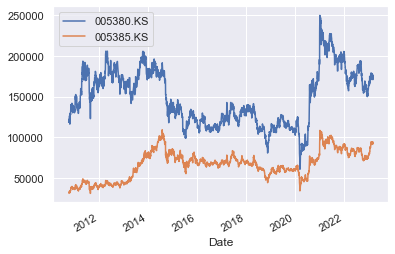

In [36]:
tickers = ['005380.KS','005385.KS']
df = yf.download(tickers,'2010-10-1','2023-3-20')['Adj Close']
data_all = df
data_all.plot()

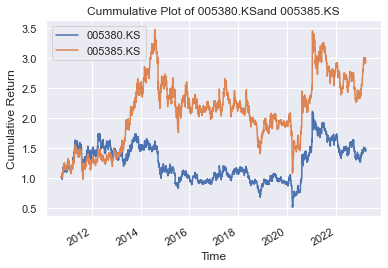

In [37]:
cumm_rtn = (1 + data_all.pct_change()).cumprod()  # 일일수익률 누적곱
cumm_rtn.plot();
plt.ylabel('Cumulative Return');
plt.xlabel('Time');
title = 'Cummulative Plot of ' + tickers[0] + 'and ' + tickers[1]
plt.title(title);

C:\Users\Hong\AppData\Local\Temp/ipykernel_16564/4236361589.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = plt.colorbar(sc)
C:\Users\Hong\AppData\Local\Temp/ipykernel_16564/4236361589.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  cb.ax.set_yticklabels([p for p in data_all[::len(data_all)//9].index])


Text(0, 0.5, '005385.KS')

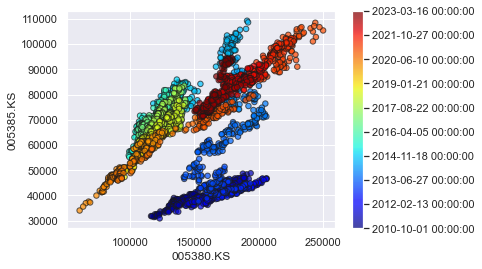

In [38]:
colors = np.linspace(0.1, 1, len(data_all))
sc = plt.scatter(data_all[tickers[0]], data_all[tickers[1]], s=30,
                 c=colors, cmap=plt.get_cmap('jet'), edgecolor='k', alpha=0.7)
cb = plt.colorbar(sc)
cb.ax.set_yticklabels([p for p in data_all[::len(data_all)//9].index])
plt.xlabel(tickers[0])
plt.ylabel(tickers[1])

In [39]:
obs_mat = sm.add_constant(data_all[tickers[0]].values, prepend=False)[:, np.newaxis]
delta = 1e-5
trans_cov = delta / (1 - delta) * np.eye(2)

# y is 1-dimensional, (alpha, beta) is 2-dimensional
kf = KalmanFilter(n_dim_obs=1, n_dim_state=2,
                  initial_state_mean=np.zeros(2),
                  initial_state_covariance=np.ones((2, 2)),
                  transition_matrices=np.eye(2),
                  observation_matrices=obs_mat,
                  observation_covariance=1.0,
                  transition_covariance=trans_cov)

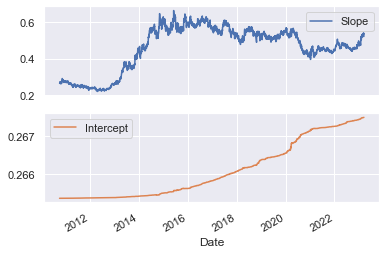

In [40]:
state_means, state_covs = kf.filter(data_all[tickers[1]])
beta_kf = pd.DataFrame({'Slope': state_means[:, 0], 'Intercept': state_means[:, 1]}, index=data_all.index)
beta_kf.plot(subplots=True);

C:\Users\Hong\AppData\Local\Temp/ipykernel_16564/2227509539.py:6: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = plt.colorbar(sc)
C:\Users\Hong\AppData\Local\Temp/ipykernel_16564/2227509539.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  cb.ax.set_yticklabels([p for p in data_all[::len(data_all)//9].index]); # [str(p.date())


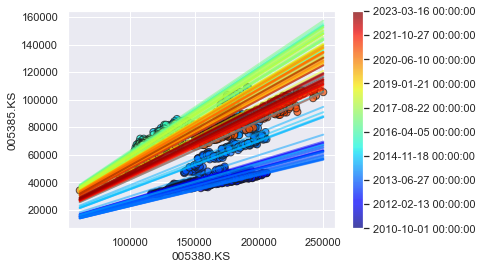

In [41]:
# visualize the correlation between assest prices over time
dates = [p for p in data_all[::int(len(data_all)/10)].index] # str(p.date())
colors = np.linspace(0.1, 1, len(data_all))
sc = plt.scatter(data_all[tickers[0]], data_all[tickers[1]],
                 s=50, c=colors, cmap=plt.get_cmap('jet'), edgecolor='k', alpha=0.7)
cb = plt.colorbar(sc)
cb.ax.set_yticklabels([p for p in data_all[::len(data_all)//9].index]); # [str(p.date())
plt.xlabel(tickers[0])
plt.ylabel(tickers[1])

# add regression lines
step = 25
xi = np.linspace(data_all[tickers[0]].min(), data_all[tickers[0]].max(), 2)
colors_l = np.linspace(0.1, 1, len(state_means[::step]))
for i, b in enumerate(state_means[::step]):
    plt.plot(xi, b[0] * xi + b[1], alpha=.5, lw=2, c=plt.get_cmap('jet')(colors_l[i]))

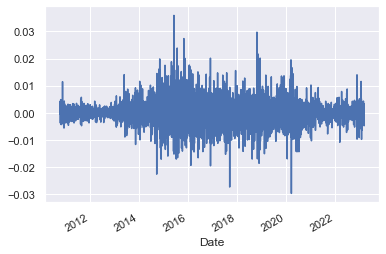

In [42]:
spread_kf = data_all[tickers[1]] - data_all[tickers[0]] * beta_kf['Slope'] - beta_kf['Intercept']
spread_kf.plot();

In [178]:
tickers = ['035720.KS','035420.KS']
df = yf.download(tickers,'2019-10-1','2023-3-20')['Adj Close']
data_all = df

[*********************100%***********************]  2 of 2 completed


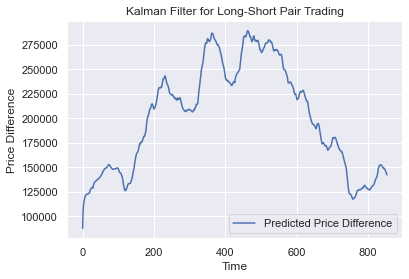

In [179]:
import numpy as np
import matplotlib.pyplot as plt

# Load the price data for two stocks

tickers = ['035720.KS','035420.KS']
df = yf.download(tickers,'2019-10-1','2023-3-20')['Adj Close']
data_all = df

price_data = np.array(df)

# Set the measurement matrix
measurement_matrix = np.array([[1, -1]])

# Set the process noise and measurement noise covariances
Q = 0.01 * np.eye(2)
R = 1.0

# Set the initial state estimate and covariance matrix
x_hat = np.zeros((2, 1))
P = np.eye(2)

# Run the Kalman filter
predicted_diff = np.zeros((len(price_data), 1))
for t in range(len(price_data)):
    # Construct the measurement vector
    y = np.array([price_data[t, 0], price_data[t, 1]])
    measurement_vector = measurement_matrix @ y.reshape(-1, 1)

    # Prediction step
    x_hat_minus = x_hat
    P_minus = P + Q

    # Update step
    K = P_minus @ measurement_matrix.T @ np.linalg.inv(measurement_matrix @ P_minus @ measurement_matrix.T + R)
    x_hat = x_hat_minus + K @ (measurement_vector - measurement_matrix @ x_hat_minus)
    P = (np.eye(2) - K @ measurement_matrix) @ P_minus

    predicted_diff[t] = measurement_matrix @ x_hat

# Plot the predicted price difference
plt.plot(predicted_diff, label='Predicted Price Difference')
plt.legend()
plt.title('Kalman Filter for Long-Short Pair Trading')
plt.xlabel('Time')
plt.ylabel('Price Difference')
plt.show()


In [180]:
price_data = np.array(price_data)

In [181]:
predicted_diff[1580]

IndexError: index 1580 is out of bounds for axis 0 with size 854

<AxesSubplot:>

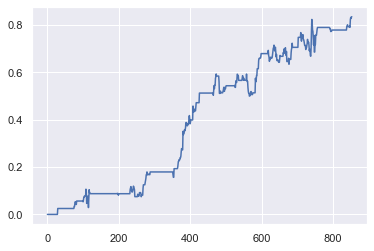

In [184]:
price_data = np.array(price_data)

units = pd.DataFrame(index = pd.DataFrame(price_data).index,columns =['ss','hy']).fillna(0)
# Set the threshold for prediction error
threshold1 = 3000
threshold2 = 3000

# Use the predicted price difference to trade the two stocks
start_cash = 10000000
cash = start_cash
shares1 = 0
shares2 = 0
prices1 = price_data[:, 0]
prices2 = price_data[:, 1]
trades1 = []
trades2 = []

for t in range(len(price_data)):
    # Calculate the current price difference
    diff = prices1[t] - prices2[t]

    # Use the predicted price difference to determine the trading position
    if predicted_diff[t] - diff > threshold1:
        # Buy stock 1 and sell stock 2
        units.iloc[t] = [-1,1]
    elif predicted_diff[t] - diff < threshold2:
        units.iloc[t] = [0,0]
    else:
        # Hold current position
        units.iloc[t] = units.iloc[t-1]

# Calculate the final portfolio value
((np.log(pd.DataFrame(price_data,columns = ['ss','hy'])).diff()) * (units)).sum(axis=1).cumsum().plot()

<AxesSubplot:>

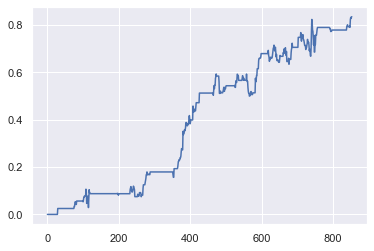

In [183]:
((np.log(pd.DataFrame(price_data,columns = ['ss','hy'])).diff()) * (units)).sum(axis=1).cumsum().plot()

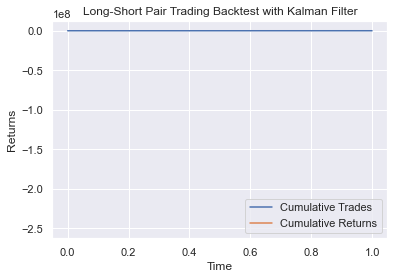

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the price data for two stocks
price_data = df
# Set the measurement matrix
measurement_matrix = np.array([[1, -1]])

# Set the process noise and measurement noise covariances
Q = 0.01 * np.eye(2)
R = 1.0

# Set the initial state estimate and covariance matrix
x_hat = np.zeros((2, 1))
P = np.eye(2)

# Run the Kalman filter to predict future price difference
predicted_diff = np.zeros((len(price_data), 1))
for t in range(len(price_data)):
    # Construct the measurement vector
    y = np.array([price_data.iloc[t, 0], price_data.iloc[t, 1]])
    measurement_vector = measurement_matrix @ y.reshape(-1, 1)

    # Prediction step
    x_hat_minus = x_hat
    P_minus = P + Q

    # Update step
    K = P_minus @ measurement_matrix.T @ np.linalg.inv(measurement_matrix @ P_minus @ measurement_matrix.T + R)
    x_hat = x_hat_minus + K @ (measurement_vector - measurement_matrix @ x_hat_minus)
    P = (np.eye(2) - K @ measurement_matrix) @ P_minus

    predicted_diff[t] = measurement_matrix @ x_hat

# Use the predicted price difference to trade the two stocks
start_cash = 100000000
cash = start_cash
shares1 = 0
shares2 = 0
prices1 = price_data.iloc[:, 0]
prices2 = price_data.iloc[:, 1]
trades1 = []
trades2 = []
for t in range(len(price_data)):
    # Calculate the current price difference
    diff = prices1[t] - prices2[t]

    # Use the predicted price difference to determine the trading position
    if predicted_diff[t] > diff:
        # Buy stock 1 and sell stock 2
        if cash > prices1[t]:
            shares1 += cash // prices1[t]
            shares2 -= cash // prices2[t]
            cash -= (cash // prices1[t]) * prices1[t]
            cash += (cash // prices2[t]) * prices2[t]
            trades1.append(cash)
            trades2.append(-cash)
    elif predicted_diff[t] < diff:
        # Sell stock 1 and buy stock 2
        if cash > prices2[t]:        
            shares1 -= cash // prices2[t]
            shares2 += cash // prices1[t]
            cash += (cash // prices1[t]) * prices1[t]
            cash -= (cash // prices2[t]) * prices2[t]
            trades1.append(-cash)
            trades2.append(cash)
    else:
        # Hold current position
        trades1.append(0)
        trades2.append(0)

# Calculate the final portfolio value
portfolio_value = cash + shares1 * prices1[-1] + shares2 * prices2[-1]

# Plot the results
plt.plot((trades1 + trades2), label='Cumulative Trades')
plt.plot(portfolio_value - start_cash, label='Cumulative Returns')
plt.legend()
plt.title('Long-Short Pair Trading Backtest with Kalman Filter')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.show()



In [65]:
portfolio_value

-483777441.2949219